In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train[0:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

In [4]:
X_train = X_train / 255.0
X_train[0:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [5]:
X_test[0:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

In [6]:
X_test = X_test / 255.0
X_test[0:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train_flat = X_train.reshape(-1, 28*28)
X_train_flat.shape

(60000, 784)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_test_flat = X_test.reshape(-1, 28*28)
X_test_flat.shape

(10000, 784)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28*28,)),
    tf.keras.layers.Conv2D(
        32,
        (3, 3),
        padding='same',
        kernel_initializer='he_uniform'
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(
        64,
        (3, 3),
        padding='same',
        kernel_initializer='he_uniform'
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(
        1024,
        #input_shape(784,),
        kernel_initializer='he_uniform'
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(
        512,
        kernel_initializer='he_uniform'
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(
        256,
        kernel_initializer='he_uniform'
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(
        10,
        kernel_initializer='glorot_uniform',
        activation='softmax'
        )
])

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001
    ),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    foctor=0.9,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

In [14]:
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [15]:
model.fit(
    X_train_flat,
    y_train,
    epochs=30,
    batch_size=2048,
    validation_data=(X_test_flat, y_test),
    callbacks=[
        reduce_lr,
        checkpoint
    ]
)

Epoch 1/30
30/30 [==============================] - ETA: 0s - loss: 0.8635 - accuracy: 0.7243
Epoch 1: val_loss improved from inf to 1.36202, saving model to best_model.h5
30/30 [==============================] - 17s 542ms/step - loss: 0.8635 - accuracy: 0.7243 - val_loss: 1.3620 - val_accuracy: 0.7440 - lr: 0.0010
Epoch 2/30
30/30 [==============================] - ETA: 0s - loss: 0.2437 - accuracy: 0.9281
Epoch 2: val_loss improved from 1.36202 to 0.18247, saving model to best_model.h5
30/30 [==============================] - 17s 557ms/step - loss: 0.2437 - accuracy: 0.9281 - val_loss: 0.1825 - val_accuracy: 0.9460 - lr: 0.0010
Epoch 3/30
30/30 [==============================] - ETA: 0s - loss: 0.1604 - accuracy: 0.9528
Epoch 3: val_loss did not improve from 0.18247
30/30 [==============================] - 17s 571ms/step - loss: 0.1604 - accuracy: 0.9528 - val_loss: 0.5464 - val_accuracy: 0.8456 - lr: 0.0010
Epoch 4/30
30/30 [==============================] - ETA: 0s - loss: 0.1247 -

In [16]:
loss, accuracy = model.evaluate(
    X_test_flat,
    y_test,
    batch_size=2048
)

print(f'테스트 데이터 정확도: {accuracy*100:.2f}%')

5/5 [==============================] - 1s 132ms/step - loss: 0.0581 - accuracy: 0.9823
테스트 데이터 정확도: 98.23%


In [17]:
idx = np.random.choice(
    len(X_test_flat),
    32,
    replace=False
)
idx

array([7751, 7926, 6632, 5476, 6751, 6182, 7216, 9200, 1868, 5781, 2749,
       7601, 4041, 1425, 8385, 8589, 7466, 6659, 2464, 9390, 4645, 3690,
       5507, 8713, 4183, 7567, 9301, 9795, 1324, 7306, 7326, 5547])

In [18]:
x_sample = X_test_flat[idx]
x_sample[0:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [19]:
y_sample = y_test[idx]
y_sample[0:1]

array([4], dtype=uint8)

In [20]:
predictions = model.predict(
    x_sample
)
predictions

1/1 [==============================] - 0s 98ms/step


array([[3.02741341e-07, 8.34889943e-06, 8.44101862e-07, 1.79523951e-08,
        9.99952674e-01, 3.72354407e-07, 3.12122256e-06, 6.33366335e-06,
        1.72184457e-06, 2.63478905e-05],
       [7.23069301e-04, 7.75946188e-04, 4.19974298e-04, 1.26395331e-04,
        7.84256481e-05, 1.68386439e-04, 9.59995377e-05, 6.00675849e-05,
        9.97386634e-01, 1.65178702e-04],
       [2.62287189e-03, 1.85334240e-03, 4.50419582e-04, 2.62599671e-03,
        2.96020694e-03, 4.00550850e-02, 7.62565120e-04, 9.87592898e-03,
        1.58295839e-03, 9.37210679e-01],
       [1.56694554e-07, 6.49909998e-06, 1.13653550e-06, 8.87380391e-09,
        9.99968290e-01, 2.45563911e-07, 3.66603581e-06, 7.69903818e-06,
        5.33001071e-07, 1.19100350e-05],
       [1.04535866e-06, 9.99982953e-01, 8.40717439e-06, 1.30858581e-07,
        3.24800635e-06, 1.84634729e-07, 4.36048850e-07, 3.20945287e-06,
        1.96625678e-07, 1.88359451e-07],
       [1.14834666e-06, 9.99989152e-01, 3.97505164e-06, 2.23148334e-07,
   

In [21]:
predicted_labels = np.argmax(
    predictions,
    axis=1
)
predicted_labels

array([4, 8, 9, 4, 1, 1, 0, 1, 1, 9, 7, 0, 8, 8, 6, 4, 6, 8, 4, 3, 5, 6,
       2, 3, 9, 1, 1, 1, 8, 5, 3, 8], dtype=int64)

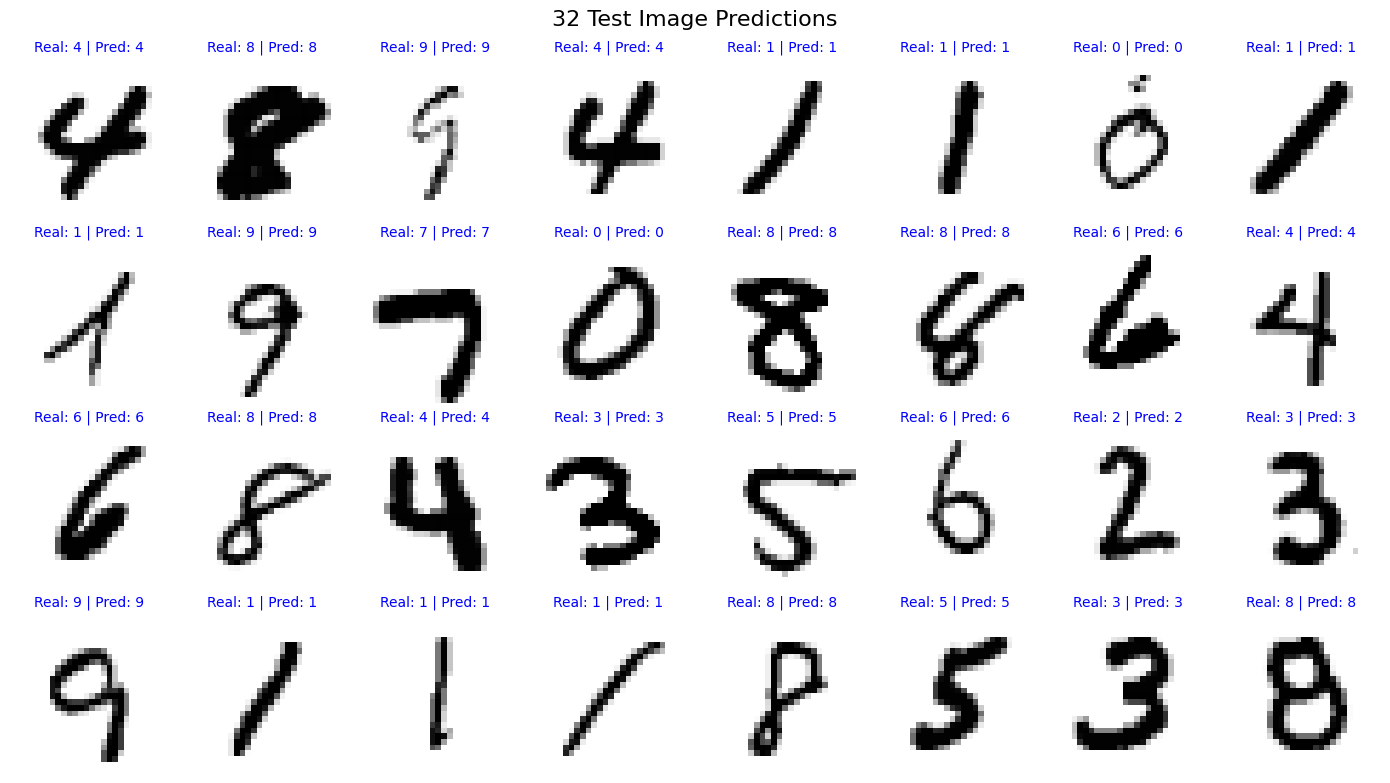

In [27]:
fig, axes = plt.subplots(
    4, 8,
    figsize=(14, 8)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(
        x_sample[i].reshape(28, 28),
        cmap='gray_r'
    )
    ax.axis('off')

    true_label = y_sample[i]
    pred_label = predicted_labels[i]

    ax.set_title(
        f'Real: {true_label} | Pred: {pred_label}',
        fontsize=10,
        color='blue' if true_label==pred_label else 'red'
    )

plt.suptitle(
    '32 Test Image Predictions',
    fontsize=16
)

plt.tight_layout()
plt.show()